# Import Necessary Libraries and fullfill basic requirements

Import Basic Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno

Import sklearn Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


Import NLP Libraries

In [ ]:
import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

from yellowbrick.classifier import PrecisionRecallCurve

import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.express as px
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

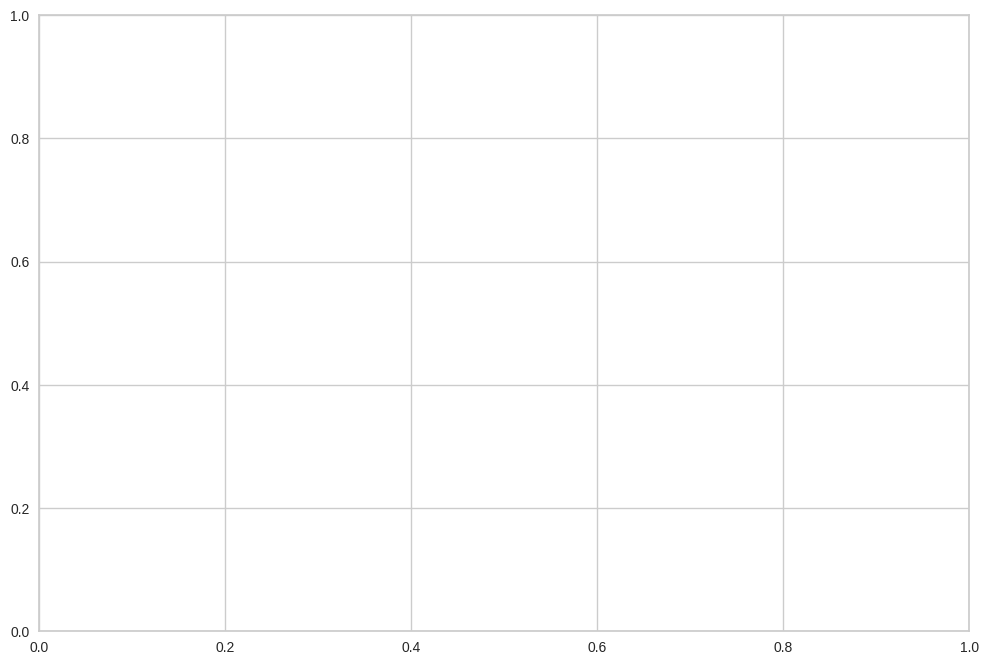

In [ ]:
# Figure&Display options
%matplotlib inline
fig, ax = plt.subplots()
# fig.set_size_inches(10, 6)
plt.rcParams["figure.figsize"] = (12, 8)  # the size of A4 paper use (11.7, 8.27)
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:
# !pip install termcolor

In [ ]:
# !pip install -U pandas-profiling --user

In [ ]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# !apt install python-colorama


In [ ]:
# !pip install termcolor

# from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact



# import pandas_profiling
# from pandas_profiling.report.presentation.flavours.html.templates import create_html_assets

# Insert data

In [ ]:
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

# Data Analysis

In [ ]:
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4,General,Dresses,Dresses


In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(1)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates


In [ ]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
Clothing ID,23486.00,918.12,203.30,0.00,861.00,936.00,1078.00,1205.00
Age,23486.00,43.20,12.28,18.00,34.00,41.00,52.00,99.00
Rating,23486.00,4.20,1.11,1.00,4.00,5.00,5.00,5.00
Recommended IND,23486.00,0.82,0.38,0.00,1.00,1.00,1.00,1.00
Positive Feedback Count,23486.00,2.54,5.70,0.00,0.00,1.00,3.00,122.00


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
Title,19676,13993,Love it!,136
Review Text,22641,22634,Perfect fit and i've gotten so many compliments. i buy all my suits from here now!,3
Division Name,23472,3,General,13850
Department Name,23472,6,Tops,10468
Class Name,23472,20,Dresses,6319


In [ ]:
# to find how many unique values numerical features have

for col in df.select_dtypes(include=[np.number]).columns:
  print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

Clothing ID feature has 1206 unique values.
Age feature has 77 unique values.
Rating feature has 5 unique values.
Recommended IND feature has 2 unique values.
Positive Feedback Count feature has 82 unique values.


In [ ]:
# to find how many unique values object features have

for col in df.select_dtypes(include="object").columns:
  print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

Title feature has 13993 unique values.
Review Text feature has 22634 unique values.
Division Name feature has 3 unique values.
Department Name feature has 6 unique values.
Class Name feature has 20 unique values.


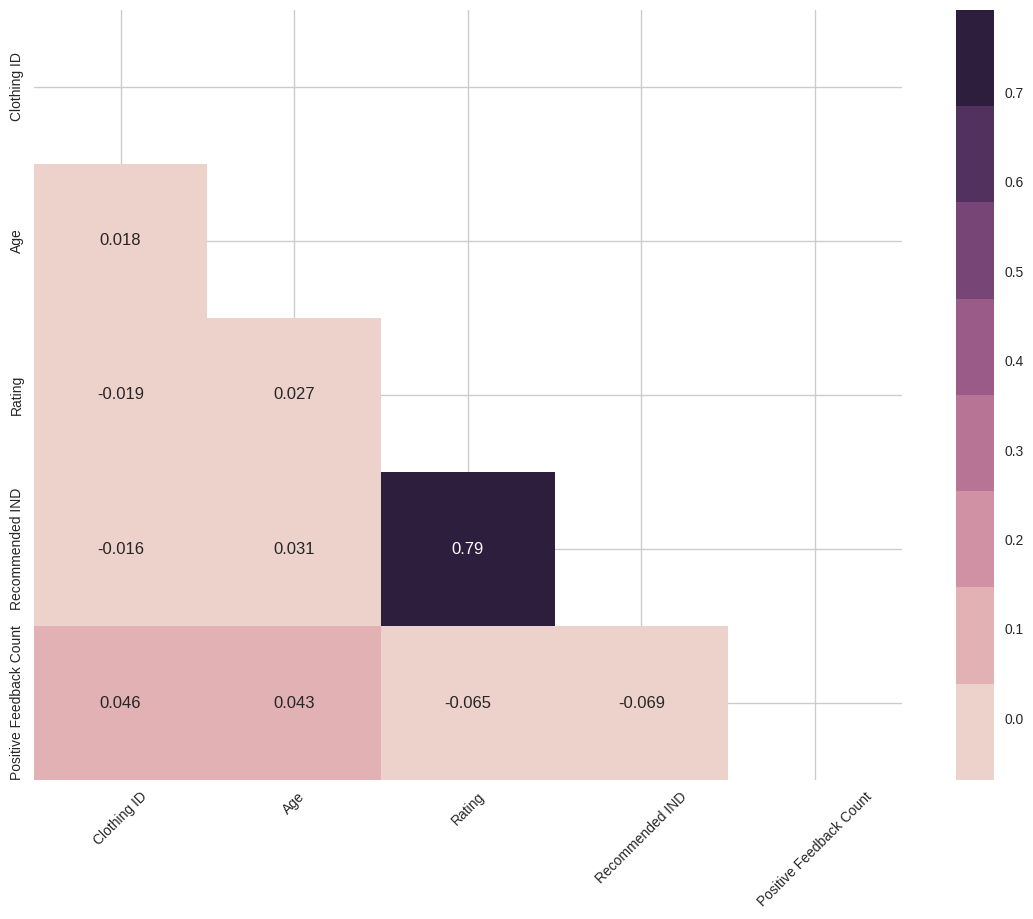

In [ ]:
plt.figure(figsize=(14, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# using the upper triangle matrix as mask
sns.heatmap(df.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix)

plt.xticks(rotation=45);

# Lets check proportion of Target class Variable

In [ ]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

Observation: "recommended_ind" is a binary variable stating
 where the customer recommends the product where 1 is recommended,
 0 is not recommended.

In [ ]:
df['Recommended IND'].describe().T

count   23486.00
mean        0.82
std         0.38
min         0.00
25%         1.00
50%         1.00
75%         1.00
max         1.00
Name: Recommended IND, dtype: float64

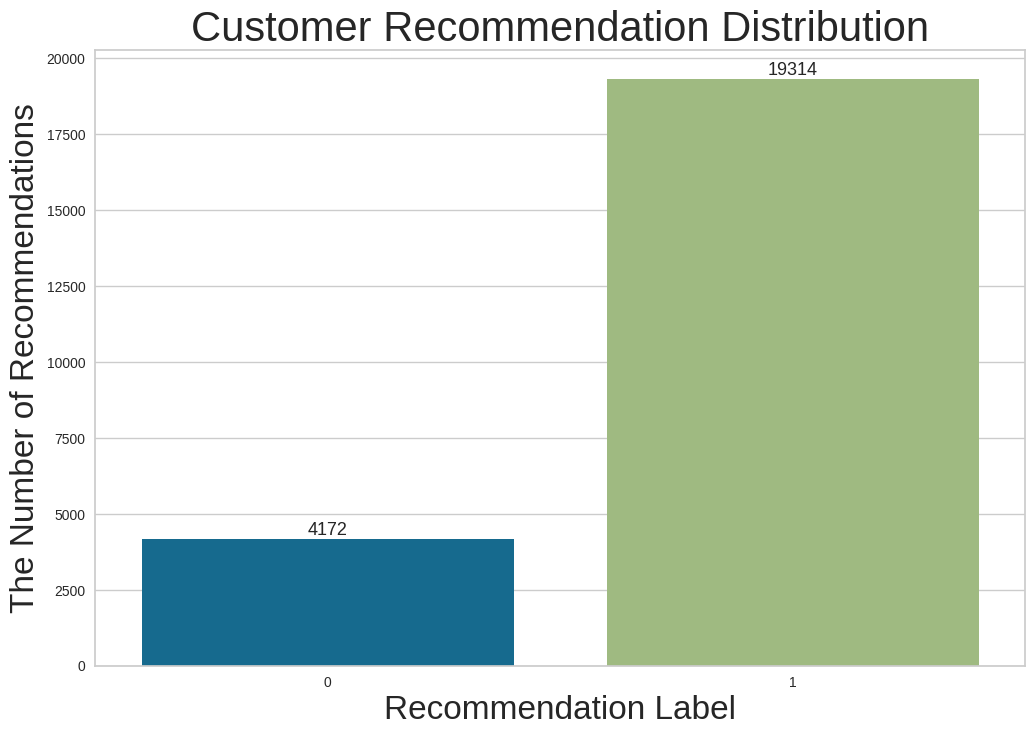

In [ ]:
sns.countplot(x="Recommended IND", data=df)
plt.title('Customer Recommendation Distribution', fontsize=30)
plt.xlabel("Recommendation Label", fontsize=24)
plt.ylabel("The Number of Recommendations", fontsize=24)

for index, value in enumerate(df["Recommended IND"].value_counts().sort_values()):
    plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize=13)

plt.show()


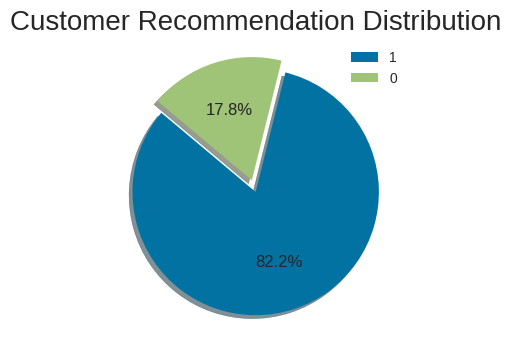

In [ ]:
plt.figure(figsize=(4, 4))

explode = [0, 0.1]
plt.pie(df['Recommended IND'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '0'])
plt.title('Customer Recommendation Distribution', fontsize=20)
plt.axis('off');

# Feature selection

our main target is to anlyze Recommended IND based on review text so now onward

In [ ]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

Now we will drop all unnecessary features and only focus on review_text and recommended_ind

In [ ]:
df.drop(['Clothing ID', 'Age', 'Title', 'Rating',
        'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],axis=1, inplace=True)


In [ ]:
df.sample(4)

,Review Text,Recommended IND
6200,"I ordered the top from a store to have it shipped. \r\nit is very pretty but once on, it fit the wrong way. i got a small because i know that this designer tends to run tight across the bust. \r\n...",0
667,"Great swimsuit, love the fabric and pattern. the top lacks support.",1
22575,This is a beautiful casual top...it is a loose fit that is generously sized so instead of my usual large i purchased the medium for a better fit...the length is perfect not too long or short! the ...,1
3309,"The colors on this top are beautiful, even more vibrant than the online picture. i was so excited to try it on. the problem is with the fitting. it's too short and too loose. you can see in the pi...",0


# Handling Missing Values

In [ ]:
df.columns

Index(['Review Text', 'Recommended IND'], dtype='object')

In [ ]:
df['Review Text'].isnull().value_counts()

False    22641
True       845
Name: Review Text, dtype: int64

Observation: Means 845 Review Text values are null

In [ ]:
df['Recommended IND'].isnull().value_counts()

False    23486
Name: Recommended IND, dtype: int64

In [ ]:
df=df.dropna()

After Dropna

In [ ]:
df['Review Text'].isnull().value_counts()

False    22641
Name: Review Text, dtype: int64

In [ ]:
df['Recommended IND'].isnull().value_counts()

False    22641
Name: Recommended IND, dtype: int64

Observation : There were total 845 rows where Review Text was Null means No review so from dropna function we remove all those rows which was containing Null values

In [ ]:
missing_values(df)

,Missing_Number,Missing_Percent


Sometimes we cannot detect missing values if they consist of empty strings such as " " In this situation we can use following syntax

In [ ]:
blanks = []  # start with an empty list

for rv in df.itertuples(): # iterate over the DataFrame
    if type(rv)==str and rv.isspace(): # avoid NaN values and test 'review' for whitespace
        blanks.append(i)
blanks

[]

Observation: Fortunately there was not such case in our data set

In [ ]:
def cleaning_fsa(data):

    import re
    #1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]','', data)

    #2. Tokenize
    text_tokens = word_tokenize(text.lower())

    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

Text Minining:
Now we will focus on Text preprocessing to make it noise free

we will follow three steps

1. Tokenization: splitting a sentence/paragraph/phrase into smaller units like words and these units are called tokens

2.Noise removal: Text which not relevant to context of data adversaly affect our output such as stop words(commonly used words like is,am, the,of etc,), then url , upper and lower case differentiation, punctuation etc.So it is beneficial to remove all of them

3.Lexicon Normalization: Another type of textual noise is multiple times representations of same word like play, player, played etc.They all are representing same meaning So there are two methods of lexicon normalization

1. Stemming  2. Lemmatization

most oftenly Lemmatization prefer because it will return the root form of each word(rather than just stripping suffixes which is stemming  )

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.

Now we will use nltk Library for all above operations

# Tokenization, Noise Removal  & Lexicon Normalization

In [ ]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
     # ayraçları kaldırıyorum ki (can't gibi) olumsuzluk içeren kelimeler içinde ayraç içerdiği için stopwords lerde silinmesin.

    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  # noktalama işaretlerinden temizleme

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]  # stopword lerden temizleme
    # tokenleri teker teker al stopwords ler içinde yoksa olduğu gibi yaz, yani stopwords ise yazma.

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

In [ ]:
df.columns

Index(['Review Text', 'Recommended IND'], dtype='object')

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
print(stop_words,end=" ")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:

df["Review Text"] = df["Review Text"].apply(cleaning_fsa)
df["Review Text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

Observation: Hence we can see all noise has been removed

# Lets Handle with rare words

In [ ]:
# " ".join(df["Review Text"]).split()

To count frequency of each word

In [ ]:
word_values = pd.Series(" ".join(df["Review Text"]).split()).value_counts()
word_values

dress       11319
fit         10091
size         9349
love         8968
top          8256
            ...  
takeout         1
teenybop        1
hugely          1
shirred         1
platinum        1
Length: 16758, dtype: int64

Words with frequency less than 2

In [ ]:
rare_words = word_values[word_values <= 2]
rare_words

wristforearm    2
magnolia        2
smalltight      2
urban           2
underrated      2
               ..
takeout         1
teenybop        1
hugely          1
shirred         1
platinum        1
Length: 10935, dtype: int64

In [ ]:
len(rare_words)

10935

In [ ]:
rare_words.index

Index(['wristforearm', 'magnolia', 'smalltight', 'urban', 'underrated',
       'henleys', 'greenyellow', 'outrageous', 'blueteal', 'status',
       ...
       'quaiity', 'befo', 'slam', 'brokenin', 'accomadate', 'takeout',
       'teenybop', 'hugely', 'shirred', 'platinum'],
      dtype='object', length=10935)

Word Cloud- Repitition of words
Now we'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

We are expected to create separate word clouds for positive and negative reviews. As such we can qualify a review as positive or negative, by looking at its recommended status.

We can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud




Detect positive and Negative reviews

In [ ]:
df.columns

Index(['Review Text', 'Recommended IND'], dtype='object')

In [ ]:
df[df["Recommended IND"] == 0]

,Review Text,Recommended IND
2,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom...,0
5,love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away...,0
10,dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back,0
22,first pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath look like described sa...,0
25,loved material didnt really look long dress purchased large medium im atleast material foot gap front much wider look felt like dress fell flat returned im usually large med fit better jean,0
...,...,...
23449,tried color really pretty fun donset want pair comfycute pant looked awful muscular thigh dont think cut falttering population also comfortable looked crotch seemed little low though pant correct ...,0
23450,wanted love jacket soft great color unfortunately light weight almost like shirt fabric nice heft fabric though nice length accept sleeve short small right size looking something slightly warmer l...,0
23460,purchased good price typically love maeve winwin fabric thin slinky unfortunate way made finding appropriate undergarment difficult add slip helped figured since im losing weight would look better...,0
23478,surprised positive review product terrible cut weird place make look wide skirt also like picture darker heavier material isnt great return,0


In [ ]:
df[df["Recommended IND"] == 1]

,Review Text,Recommended IND
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,1
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,1
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,1
6,aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet siz...,1
...,...,...
23479,wasnt sure ordering skirt couldnt see person first im glad skirt design well made doesnt look feel cheap color isnt blaring offensive red worked pale skin better anticipated wore daughter dance pr...,1
23481,happy snag dress great price easy slip flattering cut color combo,1
23482,reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleeve maybe others ok,1
23484,bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might worth side note dress de...,1


In [ ]:
# " ".join(df["Review Text"]).split()

In [ ]:
df["Recommended IND"].value_counts()

1    18540
0     4101
Name: Recommended IND, dtype: int64

In [ ]:
neg_words = " ".join(df[df["Recommended IND"] == 0]["Review Text"]).split()
# neg_words

output:  """ 'fit',
 'ok',
 'shape',
 'flattering',
 'love',
 'baby',
 'doll',
 'dress',
 'top',
 'tent',
 'dau  """

In [ ]:
pos_words =" ".join(df[df["Recommended IND"] == 1]["Review Text"]).split()
# pos_words

output
'absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened

Observation: Review Text.split will give all words of our review and we are extracting which were the positive words and negative words (based on the recommended index value is 1 or 0)

# Now lets create word cloud for most common words

In [ ]:
review_text = df["Review Text"]

In [ ]:
all_words = " ".join(df["Review Text"])

In [ ]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

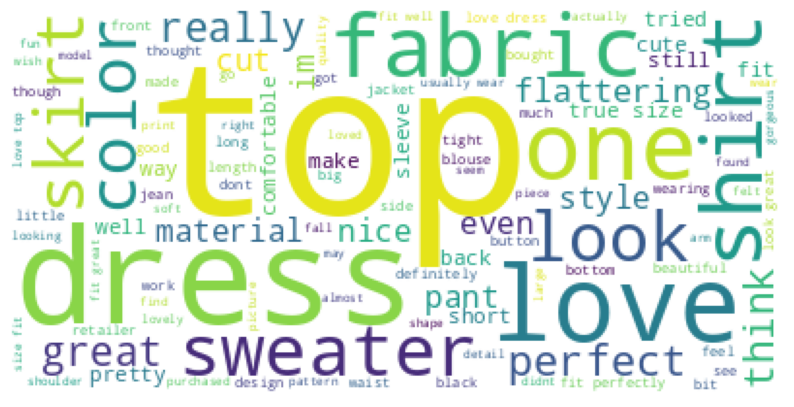

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words =250).generate(all_words)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

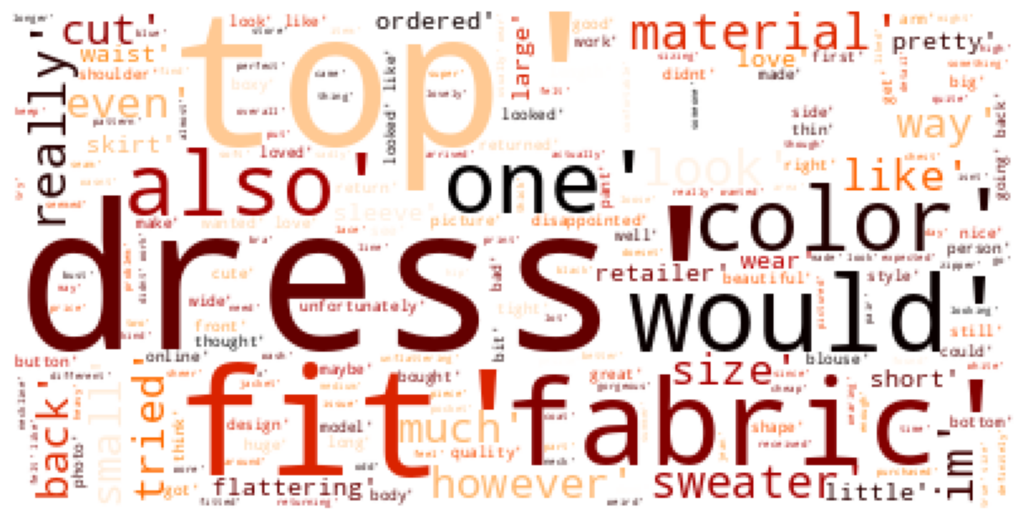

In [ ]:
wordcloud = WordCloud(background_color="white", max_words =250, colormap='gist_heat').generate(str(neg_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Sentiment Classification with Machine Learning

ML Algorithms most often take numeric feature vectors as input So here we need to convert each document into a numeric vector And this process is known as tect Vectorization [vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)

At this moment, we have our review text column as a token (which has no punctuations and stopwords). We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. We can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

And After performing data preprocessing , we will build models using following
1. Logistic Regression
2. Naive Bayes
3. Ada Boost


# Train /Test Split
So as we discussed above we will convert text files into Numeric feature vectors
And for this purpose we will use Bag Of Words (BOW) model for our analysis

# Split our data in training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df["Review Text"] #  Input Features
y= df["Recommended IND"]  # Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

Now we will create a numerical feature vector for each document

# Count Vectorization (BOW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
type(X_train_count)

scipy.sparse._csr.csr_matrix

In [ ]:
X_train_count

<18112x14828 sparse matrix of type '<class 'numpy.int64'>'
	with 471549 stored elements in Compressed Sparse Row format>

Convert X_train_count to Array

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns=vectorizer.get_feature_names_out())


,aa,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaahed,aame,ab,abbey,abby,abck,abdomen,abercrombie,ability,abject,able,abnormal,abnormally,abo,abolutely,abou,abovetheknee,abovetheshoulders,abroad,abruptly,abso,absolute,absolutely,absolutley,absolutly,absoluty,abstract,absurd,absurdly,abt,abundance,abundant,abused,ac,acacia,accent,accented,accenting,accentuate,accentuated,accentuates,accentuating,accept,acceptabl,acceptable,acceptably,accepted,accepts,access,accessorize,accessorized,accessorizes,accessorizing,accessory,accident,accidental,accidentally,acco,accomadate,accommodate,accommodated,accommodates,accommodating,accomodate,accompanies,accompany,accompanying,accomplish,accomplishing,accomplishment,accord,accordance,accordian,according,accordingly,accordinglythis,accordion,account,accumulate,accuracy,accurate,accurately,acetate,achieve,achieved,achieveit,acid,ack,acknowledge,acomfortable,acquiring,acquisition,across,acrossed,acrylic,acrylicfeeling,...,xxxxxs,yacht,yak,yank,yankee,yanking,yarn,yay,ye,yea,yeah,year,yearlove,yearold,yearround,yelling,yello,yellow,yellowbrown,yellowed,yellowgold,yellowgoldorange,yellowish,yellowivory,yellowlemon,yellowmango,yelloworange,yellowy,yep,yepeee,yes,yest,yesterday,yesterdayand,yesteryear,yet,yetand,yetbut,yethoping,yetthough,yfit,yield,yikes,yippee,yo,yoga,yogalounge,yogapantwaistband,yogapilates,yogawear,yogi,yogini,yoke,yoked,yolk,york,yoself,youd,youll,young,younger,youre,youth,youthful,youthfull,youthis,youve,youwow,yr,yuck,yucky,yuk,yummiest,yummy,yup,zag,zara,zed,zermatt,zero,zig,zigzag,zigzagging,zillion,zip,zipbutton,zipepr,ziploc,zipped,zippedfor,zipper,zippered,zipperi,zipperone,zippie,zipping,zombie,zone,zoom,zooming
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Observation: In BOW we are just count the number of occurences of each word and creating a Document Term Matrix where each row represent a document and each word representing a feature

Limitation: In BOW each word is independent and ignores order and context of words Hence it represent a document as a collection of words without considering  thesemantic meaning or importance of word. Hence the solution of this issue is TF-IDF Technique

TF-IDF: TF-IDF(Term Frequency-Inverse Document Frequency) it address limitation of BOW by taking into account the importance of words by considering both frequency of word (TF) and rarity of word(IDF)

# TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaahed,aame,ab,abbey,abby,abck,abdomen,abercrombie,ability,abject,able,abnormal,abnormally,abo,abolutely,abou,abovetheknee,abovetheshoulders,abroad,abruptly,abso,absolute,absolutely,absolutley,absolutly,absoluty,abstract,absurd,absurdly,abt,abundance,abundant,abused,ac,acacia,accent,accented,accenting,accentuate,accentuated,accentuates,accentuating,accept,acceptabl,acceptable,acceptably,accepted,accepts,access,accessorize,accessorized,accessorizes,accessorizing,accessory,accident,accidental,accidentally,acco,accomadate,accommodate,accommodated,accommodates,accommodating,accomodate,accompanies,accompany,accompanying,accomplish,accomplishing,accomplishment,accord,accordance,accordian,according,accordingly,accordinglythis,accordion,account,accumulate,accuracy,accurate,accurately,acetate,achieve,achieved,achieveit,acid,ack,acknowledge,acomfortable,acquiring,acquisition,across,acrossed,acrylic,acrylicfeeling,...,xxxxxs,yacht,yak,yank,yankee,yanking,yarn,yay,ye,yea,yeah,year,yearlove,yearold,yearround,yelling,yello,yellow,yellowbrown,yellowed,yellowgold,yellowgoldorange,yellowish,yellowivory,yellowlemon,yellowmango,yelloworange,yellowy,yep,yepeee,yes,yest,yesterday,yesterdayand,yesteryear,yet,yetand,yetbut,yethoping,yetthough,yfit,yield,yikes,yippee,yo,yoga,yogalounge,yogapantwaistband,yogapilates,yogawear,yogi,yogini,yoke,yoked,yolk,york,yoself,youd,youll,young,younger,youre,youth,youthful,youthfull,youthis,youve,youwow,yr,yuck,yucky,yuk,yummiest,yummy,yup,zag,zara,zed,zermatt,zero,zig,zigzag,zigzagging,zillion,zip,zipbutton,zipepr,ziploc,zipped,zippedfor,zipper,zippered,zipperi,zipperone,zippie,zipping,zombie,zone,zoom,zooming
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

Before diving into modelling, we will create a user-defined function for comparing models at the end

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    fig, ax = plt.subplots(figsize=(8, 8))

    plot_confusion_matrix(model, X_test, y_test, ax=ax)

Now we will Train all models using TF-IDF and count vectorizer data

# Machine Learning Modelling



# 1.Logistic Regression



# . Logistic Regression With CountVectorizer(BOW)

In [ ]:
# Logistic regression with countvectorizer
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       820
           1       0.92      0.95      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.82      0.78      0.80      4529
weighted avg       0.88      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.82      0.86      3281
           1       0.96      0.98      0.97     14831

    accuracy                           0.95     18112
   macro avg       0.94      0.90      0.92     18112
weighted avg       0.95      0.95      0.95     18112



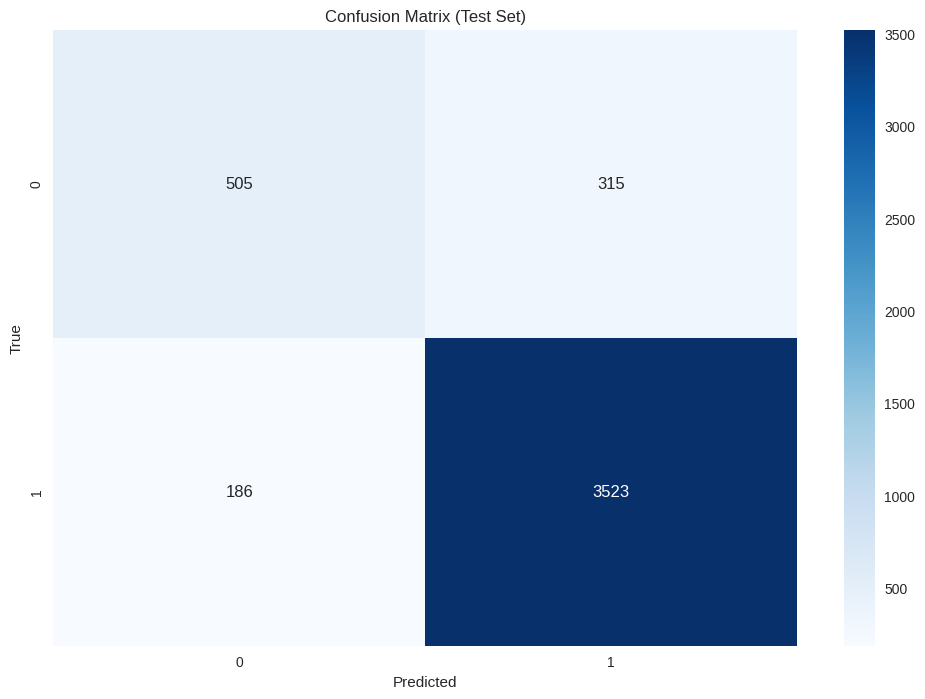

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Create a CountVectorizer for Bag-of-Words representation
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Train a logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_count, y_train)

# Evaluate the model on the test set
y_pred_test = log_model.predict(X_test_count)
print("LOG MODEL")
print("Test_Set")
print(classification_report(y_test, y_pred_test))

# Evaluate the model on the train set
y_pred_train = log_model.predict(X_train_count)
print("Train_Set")
print(classification_report(y_train, y_pred_train))

# Plot the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Set)")
plt.show()


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8676011082628479

 precision-0          score for count : 0.6049090855038028

 recall-0             score for count : 0.7775066721031952

 f1-0                 score for count : 0.6802603175897097

 precision-1          score for count : 0.9474834627695763

 recall-1             score for count : 0.8875327839503593

 f1-1                 score for count : 0.9165067192515511



Observation : Logistic Regression With CountVectorizer(BOW) above result

Precision Recall curve for logistic regression

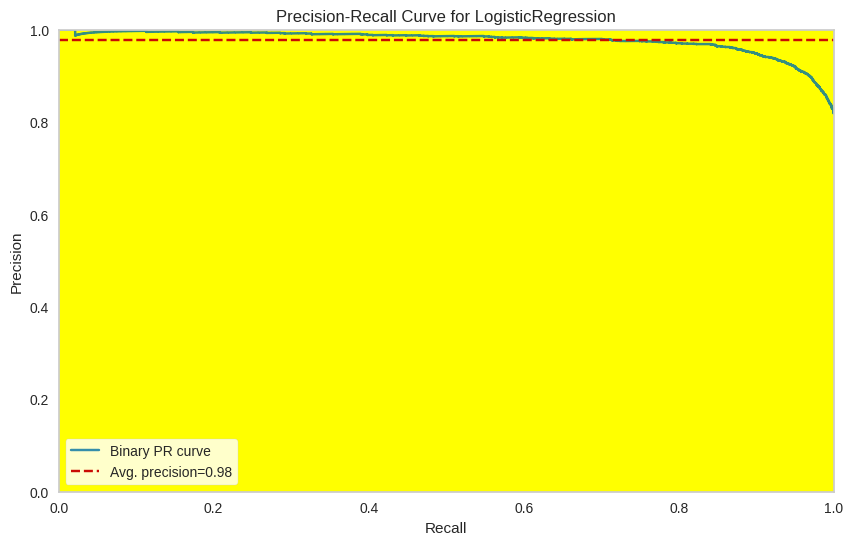

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
                            LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
log_AP_count = viz.score_

#   Logistic regression with TF-IDF vectorizer

In [ ]:

log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.80      0.53      0.64       820
           1       0.90      0.97      0.94      3709

    accuracy                           0.89      4529
   macro avg       0.85      0.75      0.79      4529
weighted avg       0.89      0.89      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.86      0.59      0.70      3281
           1       0.92      0.98      0.95     14831

    accuracy                           0.91     18112
   macro avg       0.89      0.79      0.82     18112
weighted avg       0.90      0.91      0.90     18112



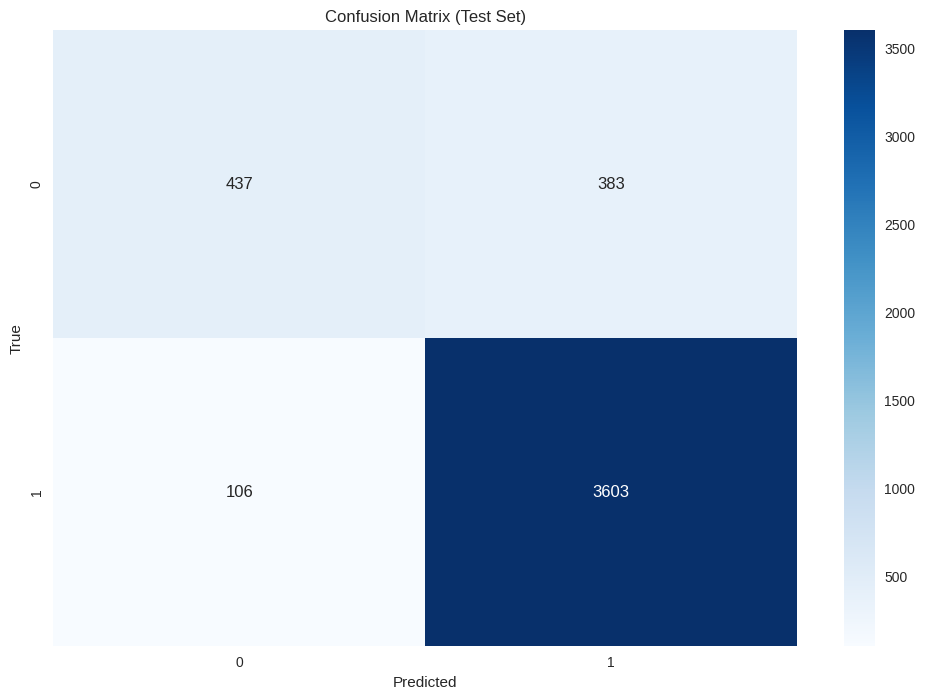

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_tf_idf = vectorizer.fit_transform(X_train)
X_test_tf_idf = vectorizer.transform(X_test)

# Train a logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_tf_idf, y_train)

# Evaluate the model on the test set
y_pred_test = log_model.predict(X_test_tf_idf)
print("LOG MODEL")
print("Test_Set")
print(classification_report(y_test, y_pred_test))

# Evaluate the model on the train set
y_pred_train = log_model.predict(X_train_tf_idf)
print("Train_Set")
print(classification_report(y_train, y_pred_train))

# Plot the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Set)")
plt.show()


In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8605887128329085

 precision-0          score for tfidf : 0.5792981526504878

 recall-0             score for tfidf : 0.8457780413670397

 f1-0                 score for tfidf : 0.6874044068054663

 precision-1          score for tfidf : 0.9620405901777529

 recall-1             score for tfidf : 0.8638654526684274

 f1-1                 score for tfidf : 0.9102738353858217



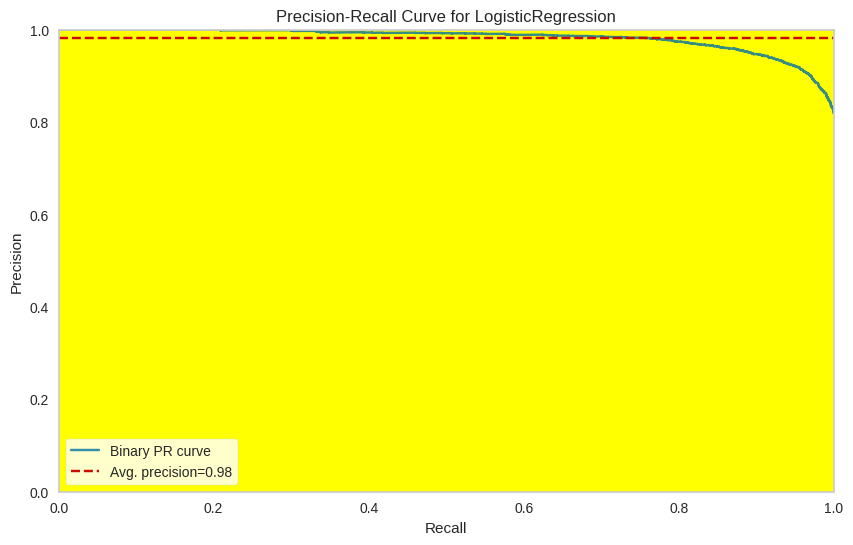

In [ ]:
viz = PrecisionRecallCurve(
                            LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced"),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

Comparison of result of Logistic Regression from both BOW and TF-IDF

Metric	      BOW	TF-        IDF

Accuracy      0.89	       0.86

Precision-0	  0.80	      0.58

Recall-0	   0.53	       0.85

F1-score-0	 0.64	      0.69

Precision-1	 0.90	     0.96

Recall-1	   0.97	     0.86

F1-score-1   0.94	    0.91

Overall, the TF-IDF representation resulted in slightly lower accuracy but higher precision and F1-score for class 1, making it a better choice for this specific classification task.

In [ ]:
log_AP_tfidf = viz.score_

# 2 Naive Baye



#  Naive Bayes With Count Vectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

MultinomialNB()

MultinomialNB()

In [ ]:
# !pip install --upgrade scikit-learn


NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.73      0.61      0.66       820
           1       0.92      0.95      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.82      0.78      0.80      4529
weighted avg       0.88      0.89      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      3281
           1       0.95      0.95      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.86      0.86      0.86     18112
weighted avg       0.92      0.92      0.92     18112



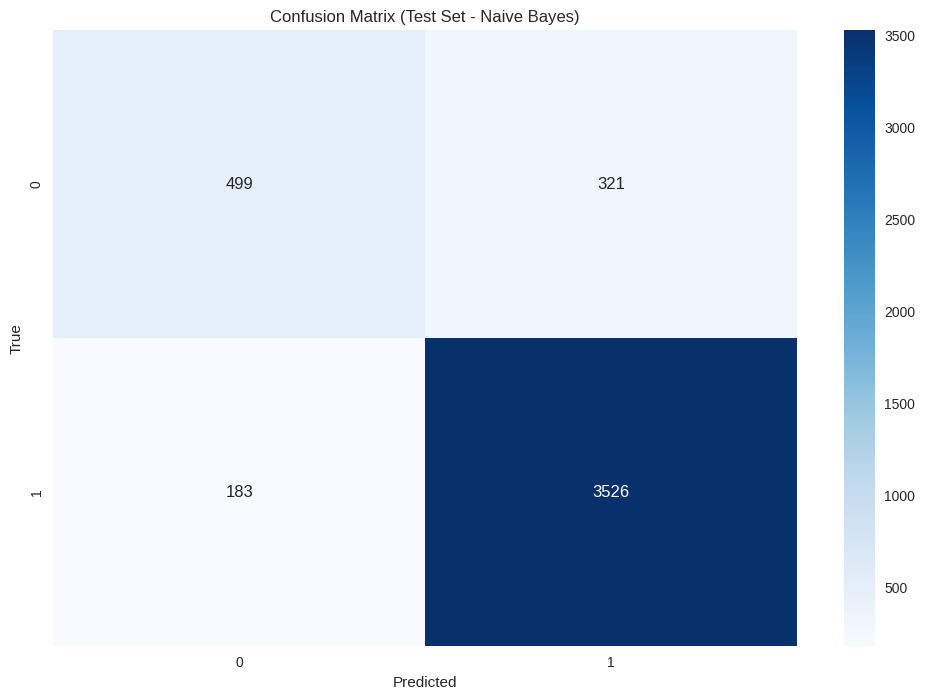

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set using the trained Naive Bayes model
y_pred_test_nb = nb.predict(X_test_count)
print("NB MODEL")
print("Test_Set")
print(classification_report(y_test, y_pred_test_nb))

# Predict labels for the train set using the trained Naive Bayes model
y_pred_train_nb = nb.predict(X_train_count)
print("Train_Set")
print(classification_report(y_train, y_pred_train_nb))

# Plot the confusion matrix for the test set
conf_matrix_test_nb = confusion_matrix(y_test, y_pred_test_nb)
sns.heatmap(conf_matrix_test_nb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Set - Naive Bayes)")
plt.show()


In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_count_rec = scores
    elif i == "f1-1":
        nb_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8831162091364643

 precision-0          score for count : 0.6899058166484136

 recall-0             score for count : 0.6455472977982059

 f1-0                 score for count : 0.666374990503019

 precision-1          score for count : 0.9227511127051462

 recall-1             score for count : 0.9356750267633357

 f1-1                 score for count : 0.9291307789832967



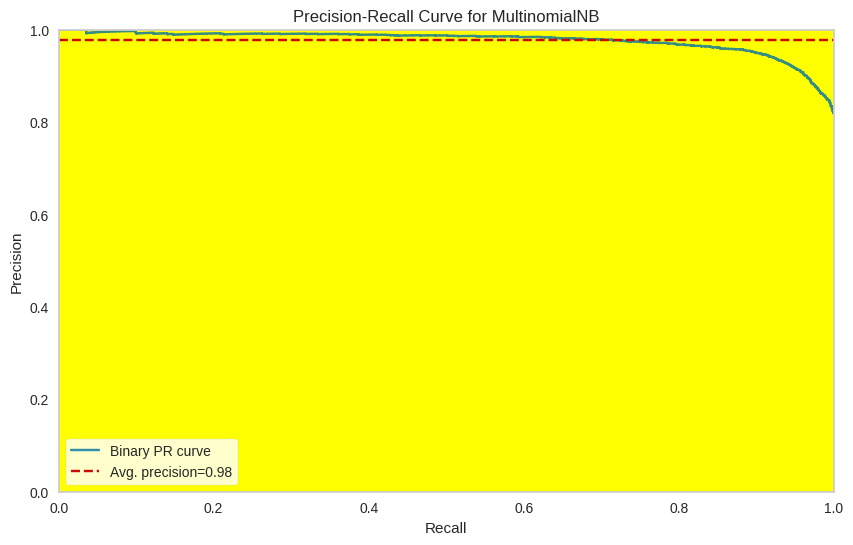

In [ ]:
viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
nb_AP_count = viz.score_

# Naive Bayes with TF-IDF Vectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

MultinomialNB()

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.02      0.05       820
           1       0.82      1.00      0.90      3709

    accuracy                           0.82      4529
   macro avg       0.89      0.51      0.47      4529
weighted avg       0.85      0.82      0.75      4529

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.06      0.11      3281
           1       0.83      1.00      0.91     14831

    accuracy                           0.83     18112
   macro avg       0.91      0.53      0.51     18112
weighted avg       0.86      0.83      0.76     18112



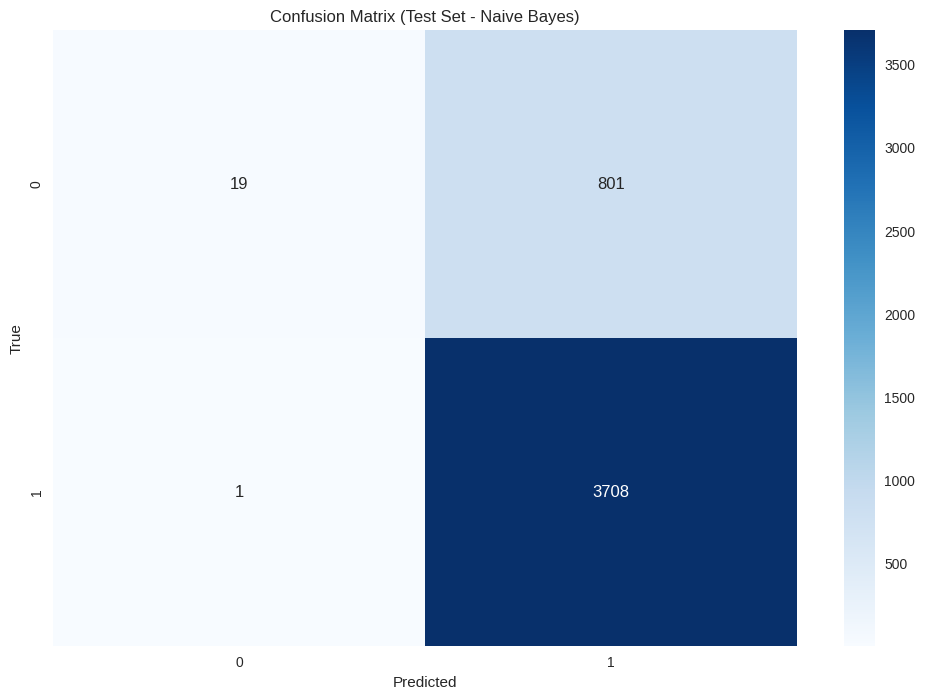

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set using the trained Naive Bayes model
y_pred_test_nb = nb.predict(X_test_tf_idf)
print("NB MODEL")
print("Test_Set")
print(classification_report(y_test, y_pred_test_nb))

# Predict labels for the train set using the trained Naive Bayes model
y_pred_train_nb = nb.predict(X_train_tf_idf)
print("Train_Set")
print(classification_report(y_train, y_pred_train_nb))

# Plot the confusion matrix for the test set
conf_matrix_test_nb = confusion_matrix(y_test, y_pred_test_nb)
sns.heatmap(conf_matrix_test_nb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Set - Naive Bayes)")
plt.show()


In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_tfidf_rec = scores
    elif i == "f1-1":
        nb_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8703068871490511

 precision-0          score for tfidf : 0.6652137922384594

 recall-0             score for tfidf : 0.5723895396248795

 f1-0                 score for tfidf : 0.6148665482220466

 precision-1          score for tfidf : 0.9082793260759405

 recall-1             score for tfidf : 0.9362148827774981

 f1-1                 score for tfidf : 0.9220122200846509



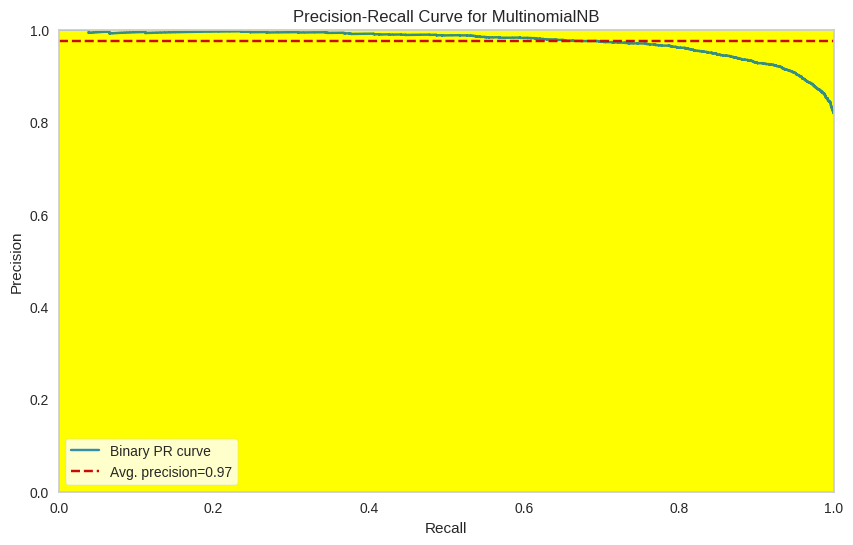

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
nb_AP_tfidf = viz.score_

# Comparing the models

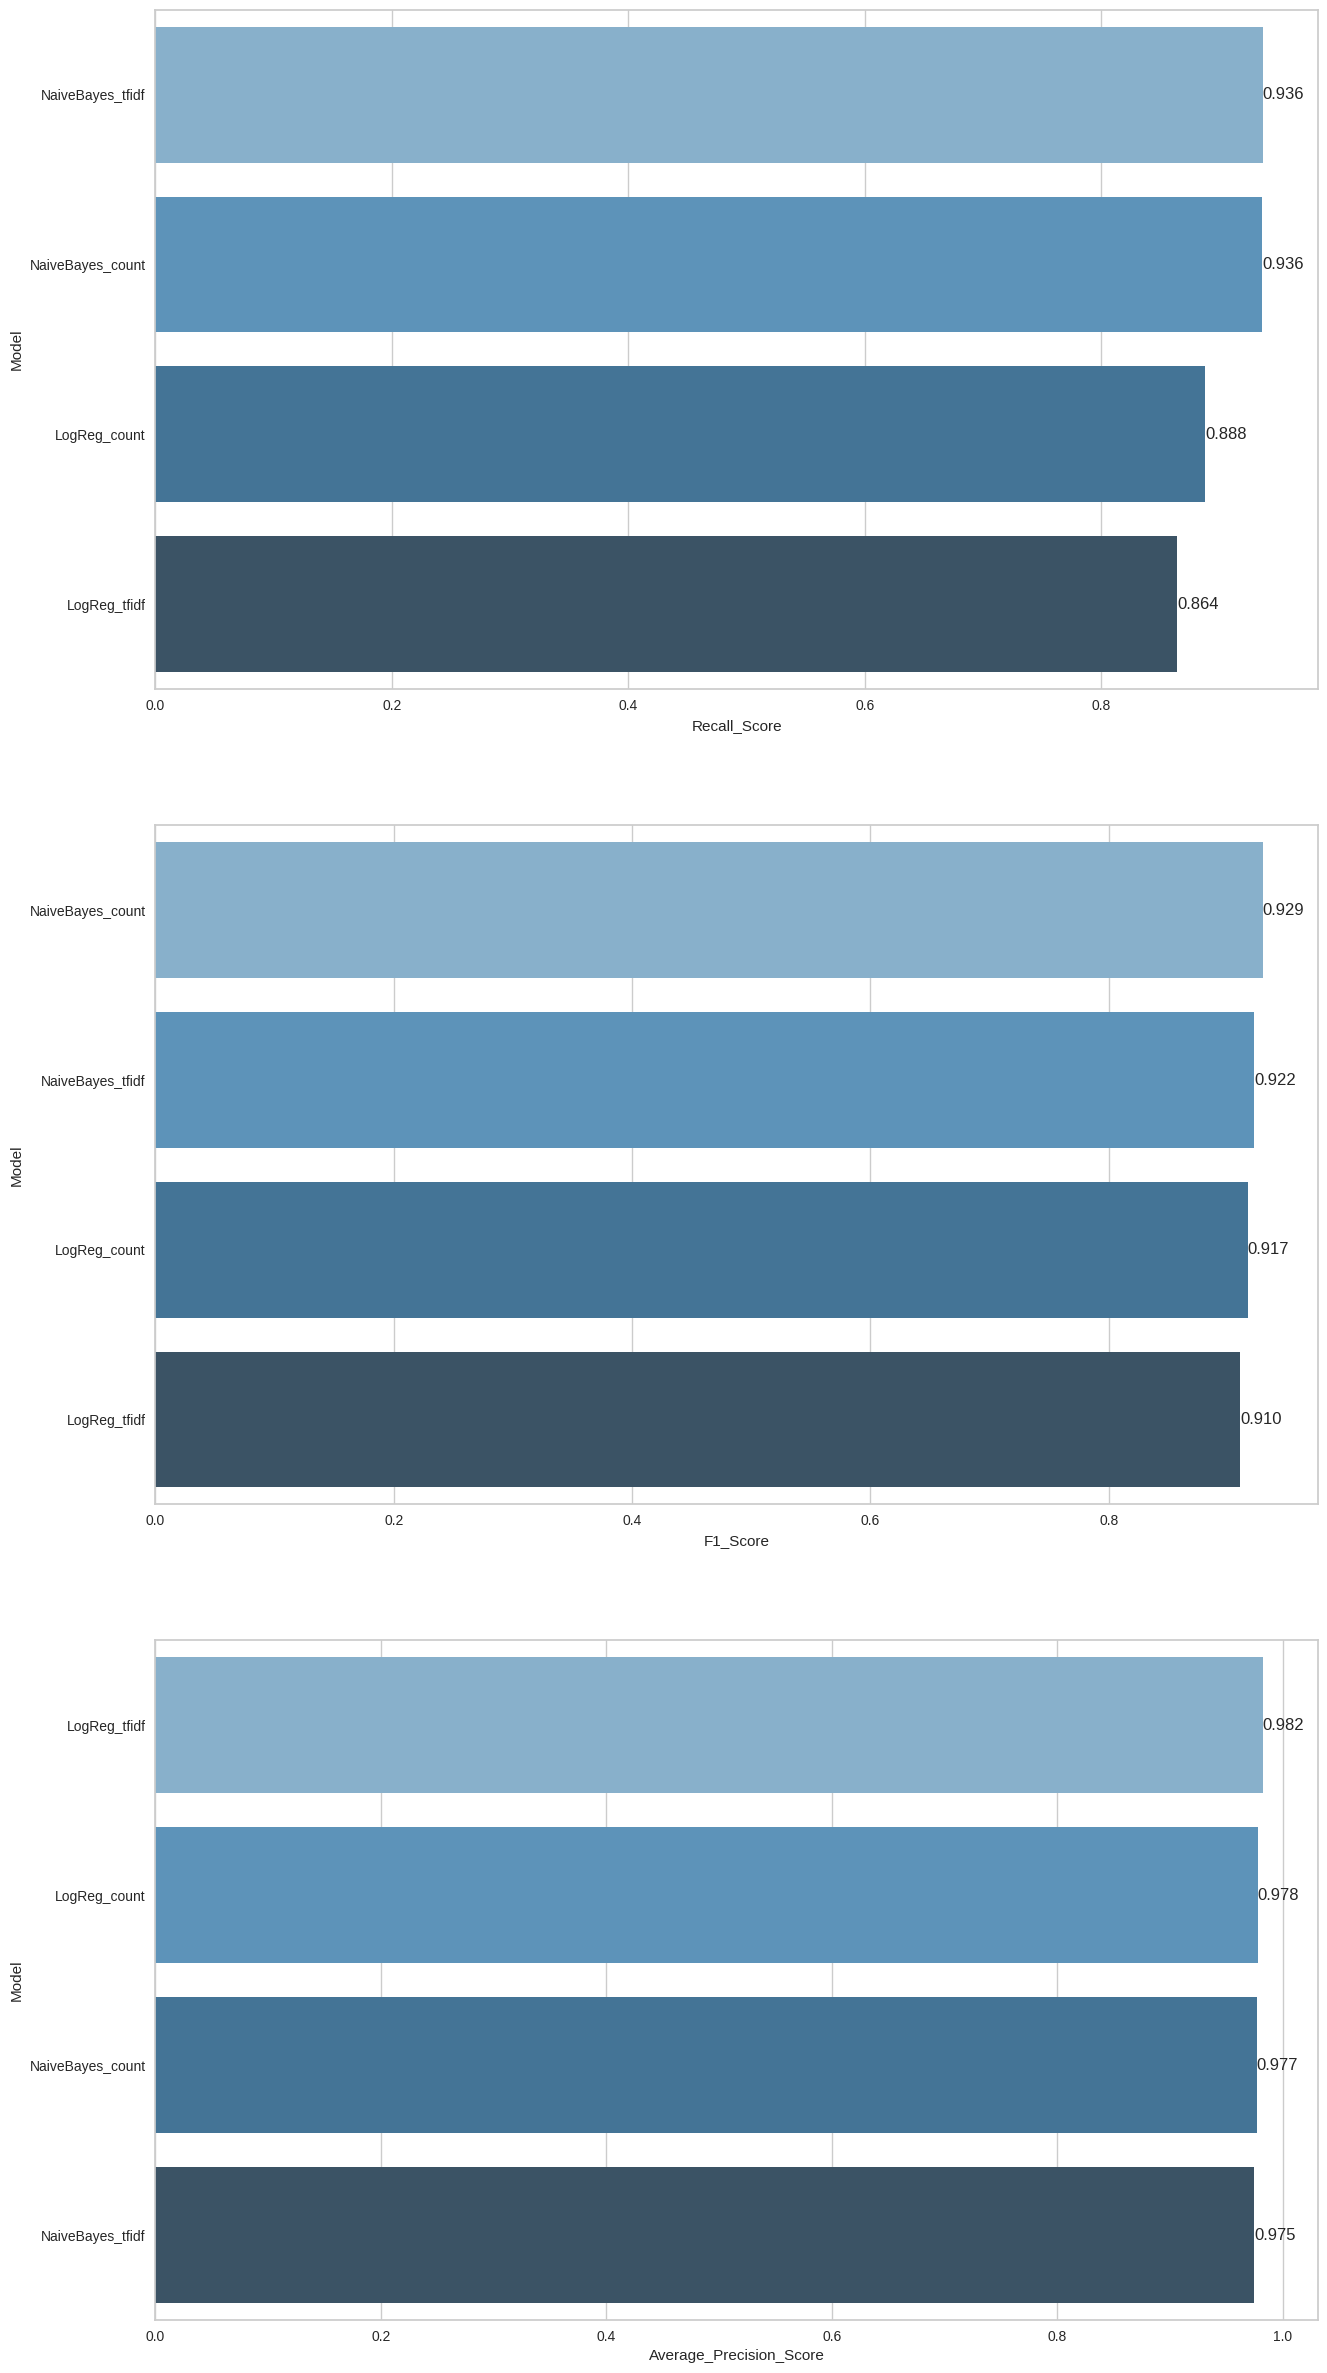

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count",
                                   "NaiveBayes_tfidf", "LogReg_tfidf",
                                  ],

                        "F1_Score": [nb_count_f1, log_count_f1,
                                     nb_tfidf_f1, log_tfidf_f1,
                                    ],

                        "Recall_Score": [nb_count_rec, log_count_rec,

                                         nb_tfidf_rec, log_tfidf_rec,
                                        ],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count,
                                                    nb_AP_tfidf, log_AP_tfidf,
                                                    ]})

def labels(ax):

    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();